In [38]:
from typing import TypedDict  , Literal , Optional
from langgraph.graph import StateGraph , START , END
from agents import determine_subject_agent_run_sync


In [39]:
class AIClassState(TypedDict):
    """
    State for the AI class.
    """
    query: str
    subject: Optional[Literal["english", "mathematics", "science"]]
    answer: Optional[str]

In [ ]:
def determine_subject(state: AIClassState) -> AIClassState:
    """
    Determine the subject based on the state.
    """

    print("Determining subject...")
    print(f"Query: {state['query']}")

    subject = determine_subject_agent_run_sync(state["query"])

    print(subject)

    state["subject"] = subject

    return state


def subject_router(state: AIClassState) -> str:
    """
    Route to the appropriate subject node based on the subject in the state.
    """
   
    subject = state["subject"]

    print(f"Routing to subject: {subject}")

    if subject == "english":
        return "english_node"
    elif subject == "mathematics":
        return "mathematics_node"
    elif subject == "science":
        return "science_node"
    else:
        raise ValueError(f"Unknown subject: {subject}")


def english_node(state: AIClassState) -> AIClassState:
    """
    Node for the English subject.
    """
    state["answer"] = "english answer"
    
    return state


def mathematics_node(state: AIClassState) -> AIClassState:
    """
    Node for the Mathematics subject.
    """
    state["answer"] = "mathematics answer"
    
    return state

def science_node(state: AIClassState) -> AIClassState:
    """
    Node for the Science subject.
    """
    state["answer"] = "science answer"
    
    return state



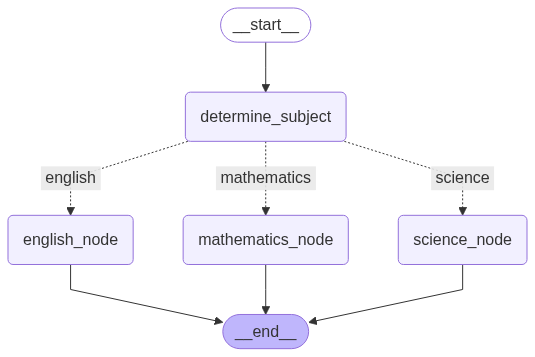

In [41]:
ai_class_graph = StateGraph(AIClassState)

ai_class_graph.add_node("determine_subject", lambda state: state)
ai_class_graph.add_node("english_node", english_node)
ai_class_graph.add_node("mathematics_node", mathematics_node)
ai_class_graph.add_node("science_node", science_node)


ai_class_graph.add_edge(START, "determine_subject")
ai_class_graph.add_conditional_edges(
    "determine_subject", 
    subject_router, 
    {
        "english": "english_node",
        "mathematics": "mathematics_node",
        "science": "science_node"
    }
)

ai_class_graph.add_edge("determine_subject", END)


ai_class = ai_class_graph.compile()

ai_class


In [42]:
ai_class.invoke(
    AIClassState(
        query="What is the tense of the verb in the sentence 'She is running'?",
        subject=None,
        answer=None
    )
)

Routing to subject: None


ValueError: Unknown subject: None